# Bilan Carbone Datarmor

## Recuperations heures CPU

Denis a envoye un mail contenant les heures CPU pour les utilisateur affilies a Marbec (groupes unix `emeX`, `marbecmd`). Ce mail a ete traite pour mettre les donnees au format CSV. 

Ensuite, le temps CPU mensuel par utilisateur a ete trace:

In [40]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv('data-datarmor/marbec-datarmor-2024.csv', skiprows=1, index_col=0)
data = data.sum(axis=1)
data

user
adupaix     81321227
aduparc            0
amorell          106
aroy               0
cfelix             4
              ...   
agobet         42308
mvignero           0
cgonzale           0
sdijoux            0
scrochem           0
Length: 66, dtype: int64

In [42]:
# with open('data-datarmor/mail-mickael-2023.txt') as fin:
#     lines = fin.readlines()
# lines

# regex = re.compile('([0-9]{4}) *: *([a-z]+) *: *([0-9]+)')
# regex = re.compile('([0-9]{4})')
# output = []
# for l in lines:
#     l = l.strip()
#     if regex.match(l):
#         l = l.replace(' ', '')
#         temp = l.split(':')
#         output.append(temp)

# output = np.array(output)
# dsout = pd.DataFrame(output[:, 1:])
# dsout.columns = ['user', 'cpu']
# #dsout['date'] = dsout['date'].astype(int)
# dsout['cpu'] = dsout['cpu'].astype(int)
# #dsout['year'] = dsout['date'] // 100
# # dsout['month'] = dsout['date'] - 100 * dsout['year']
# dsout

In [43]:
# dsout_byuser = dsout.groupby(dsout['user']).sum()
# dsout_byuser = dsout_byuser.sort_values(by=['cpu'], ascending=False)
# dsout_byuser = dsout_byuser.drop('jrault')
# dsout_byuser

In [44]:
data = data.sort_values(ascending=False)
data = data.where(data > 0)
data = data.dropna()
data

user
ldalaut     8.966198e+09
vdaniell    4.798531e+09
mlengaig    4.588111e+09
omaury      4.507331e+09
ydsoviad    3.741519e+09
nbarrier    3.499230e+09
mdouille    4.590945e+08
ldecubbe    4.465799e+08
aricouar    2.251721e+08
cabello     1.306821e+08
bcheikhm    1.117082e+08
jrault      8.226618e+07
adupaix     8.132123e+07
rcanet      3.263366e+07
mbeneat     2.848146e+07
jnaudet     1.384172e+07
dkaplan     1.123298e+07
cdutheil    1.009914e+07
smahevas    9.312267e+06
rioliver    5.074468e+06
dcortese    2.115540e+05
slapegue    6.915300e+04
agobet      4.230800e+04
crestrep    2.780000e+02
amorell     1.060000e+02
llaumedr    8.000000e+00
cfelix      4.000000e+00
dtype: float64

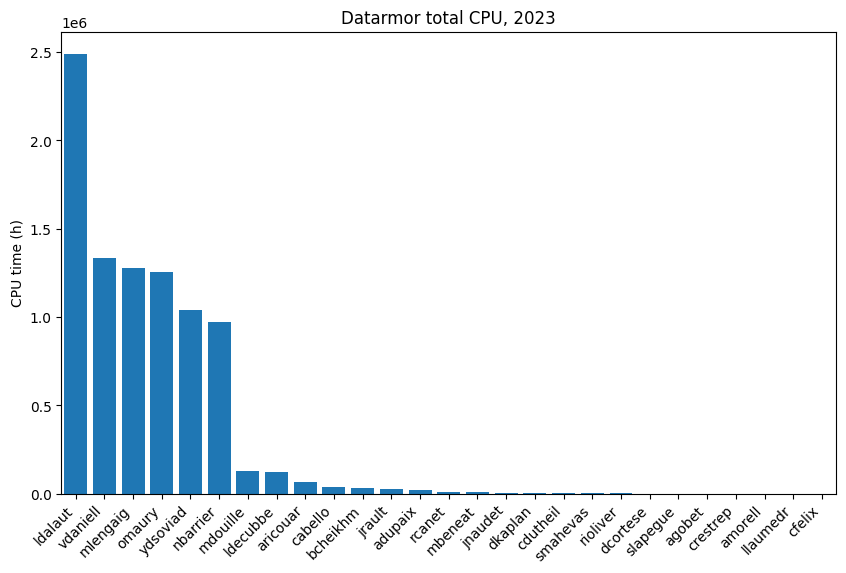

In [45]:
plt.figure(figsize=(10, 6))
ax = plt.gca()
x = np.arange(0, len(data))
plt.bar(x, data/ (60 * 60))
ax.set_xticks(x)
ax.set_xticklabels(data.index, rotation=45, ha='right')
ax.set_xlim(x.min() - 0.5, x.max() + 0.5)
ax.set_ylabel('CPU time (h)')
ax.set_title('Datarmor total CPU, 2023')
plt.savefig('datarmor_usage_2023')

## Estimation consomation d'un coeur

La consomation d'une heure CPU a ete estimee a partir des Dashboards Datarmor:

- https://grafana.ifremer.fr/d/000000022/datarmor-diris?orgId=1&from=1672527600000&to=1704063599000
- https://grafana.ifremer.fr/d/000000038/datarmor-pbsacctsql-rapport-exploit?orgId=1&from=1672527600000&to=1704063599000

Ainsi, on a:

In [46]:
ctot = 1.64 * 1e6 # kWh

# Heures CPU totales
cputot = (2003 + 47780 + 17196) * 1000  # conversion kiloheure/heure

# mean = ptot / cputot # conversion from kW
mean = ctot / cputot # en kWh/h donc en kW

#print('Puissance moyenne heure CPU (kW): ', mean)
print('Consommation moyenne heure CPU (kWh): ', mean)

Consommation moyenne heure CPU (kWh):  0.02448528643306111


## Estimation consomation totale

Pour avoir la consomation totale, on somme sur tous les utilisateurs les temps CPU, que l'on multiplie par la consomation moyenne d'un noeud:

In [47]:
# conversion from seconds to hours
conv = 1 / (60 * 60)

# Sum over years
total_cpu = data.sum()

# Sum over users
print('Consomation totale (kWh)')
data = total_cpu * mean * conv
data

Consomation totale (kWh)


215938.07531033774

## Facteurs multiplicatifs

Pour prendre en compte le coût de fabrication et de démantèlement du matériel informatique, on multiplie par le "FCYP" (d'après LOCEAN, en France, 1.42)

In [48]:
fcyp = 1.42
data = data * fcyp

## Consomation de carbone

Pour convertir la consomation en equivalent CO2, on considere qu'en France, 1 kWh est equivalent a 0.1 kg d'equivalent CO2. Ainsi, les emissions sont obtenues en multipliant le tableu precedent par 0.1

In [49]:
conv = 0.1
kg2ton = 1e-3

print('Equivalent CO2 (ton eq. CO2)')
print(data * conv * kg2ton)

Equivalent CO2 (ton eq. CO2)
30.66320669406796
